# **1. Perkenalan Dataset**


**1. Sumber Dataset :** <br>
The Ship Performance Dataset adalah kumpulan data sintetis namun realistis yang dirancang untuk merepresentasikan metrik operasional utama dan atribut berbagai jenis kapal di Teluk Guinea. Dataset ini ditujukan bagi para penggemar analitik data maritim, praktisi machine learning, serta profesional yang tertarik dalam eksplorasi masalah klasterisasi, prediksi, dan optimasi di industri maritim. <br>
Dataset ini didownload dari Kaggle (https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset) pada tanggal 15 Maret 2025

**2. Ketentuan Dataset :** <br>
- Dataset tidak memiliki label
- Jumlah baris : 2736 baris
- Tipe data : 6 fitur kategorik dan 11 fitur numerik

**3. Pembatasan Dataset :** <br>
Dataset yang digunakan adalah The Ship Performance Dataset.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis**

Tahap ini meliputi :

**1. Memahami Struktur Data**
- Tinjau jumlah baris dan kolom dalam dataset.
- Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

**2. Menangani Data yang Hilang**
- Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

**3. Analisis Distribusi dan Korelasi**
- Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
- Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

**4. Visualisasi Data**
- Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
- Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

In [3]:
# mengecek ukuran dataset, tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

**Insight :**
- Dataset memiliki 2736 baris dengan 18 fitur
- Terdapat 5 fitur kategorik dan 12 fitur numerik
- Terdapat kesalahan tipe data pada fitur Date yang seharusnya datetime, namun karena fitur Date **tidak relevan** dengan data performance maka **akan didrop**

In [4]:
# menghapus fitur Date
df = df.drop(columns=['Date'])

In [5]:
# mengecek banyak missing value pada tiap fitur
df.isnull().sum()

Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [6]:
# mengecek banyak baris yang memiliki missing value
df.isnull().any(axis=1).sum()

609

**Insight :**
- Terdapat missing value pada 5 fitur kategorik (Ship_Type, Route_Type, Engine_Type, Maintenance_Status, dan Weather_Condition) dengan masing-masing 136 baris data
- Banyak baris data yang memiliki missing value (setidaknya 1) adalah 609 baris
- Karena baris yang memiliki missing value cukup banyak, maka akan **diisi dengan modus** dari setiap fitur yang missing tersebut

In [7]:
# melihat statistics descriptive fitur numerik
display(df.describe())

# melihat statistics descriptive fitur kategorik
display(df.describe(exclude=np.number))

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
count,2600,2600,2600,2600,2600
unique,4,4,3,3,3
top,Bulk Carrier,Long-haul,Diesel,Good,Calm
freq,669,686,892,873,893


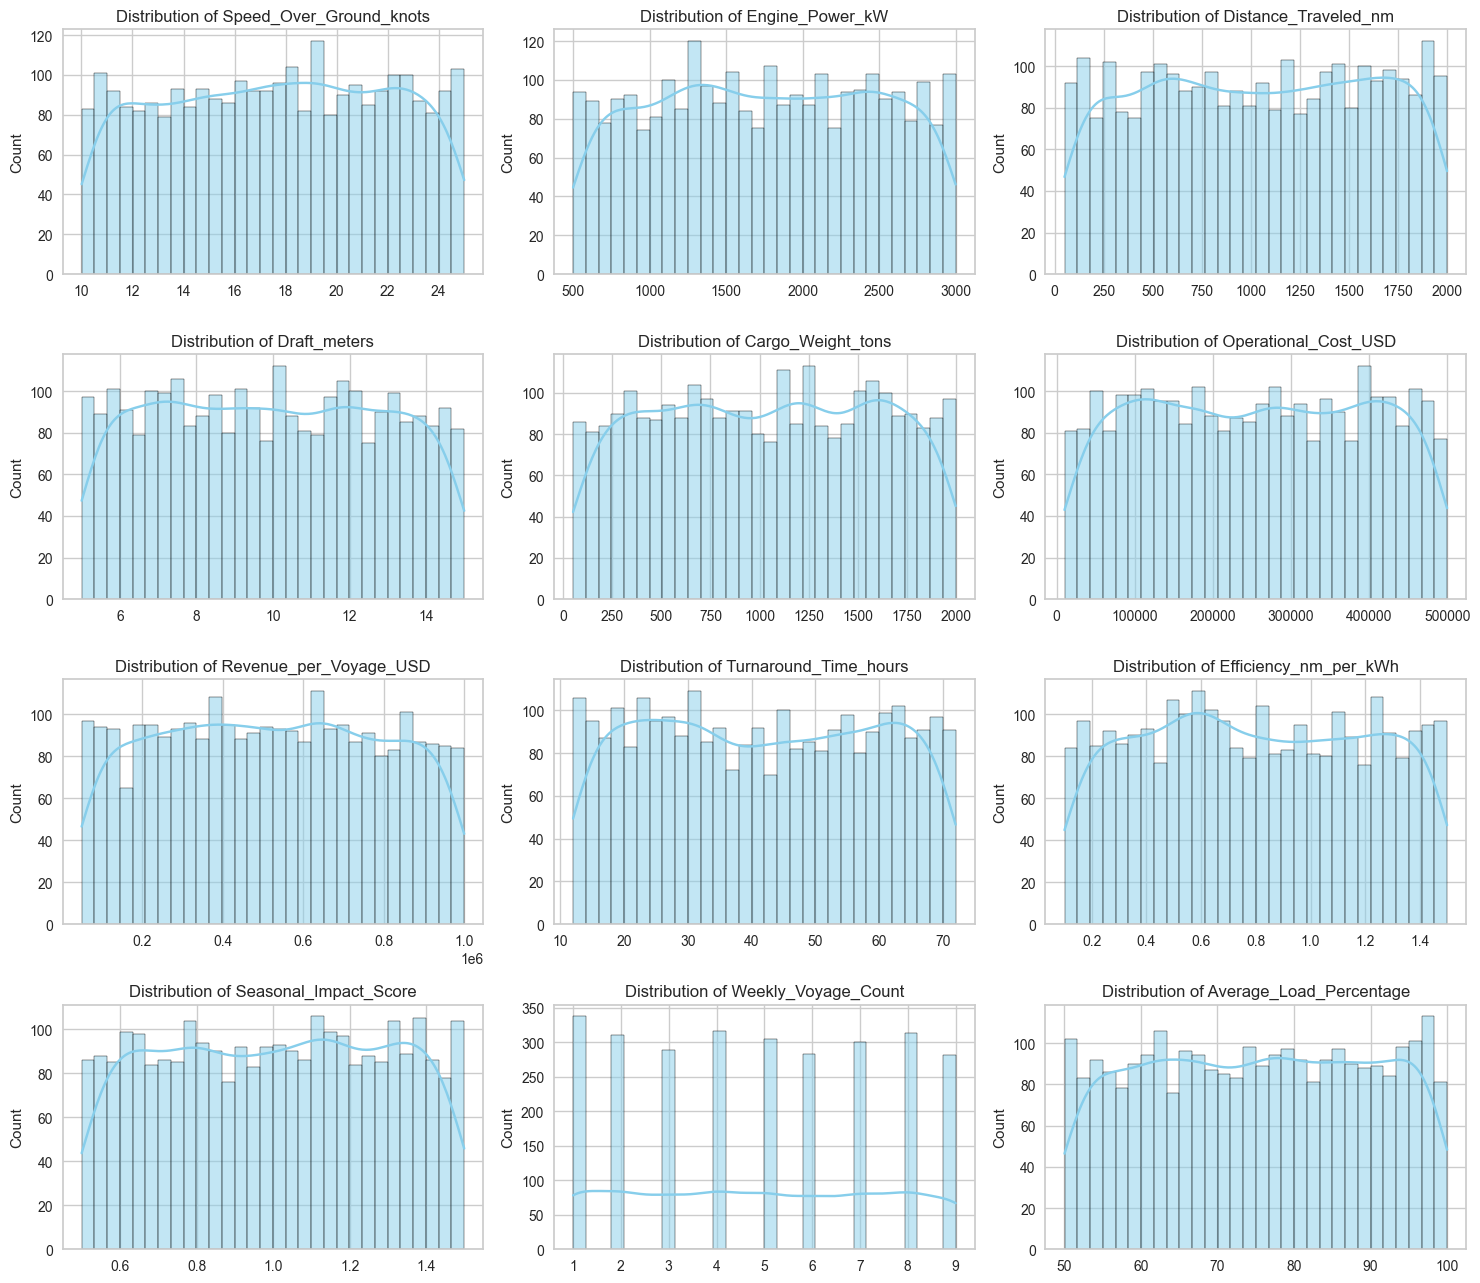

In [8]:
# melihat distribusi fitur numerik

# inisialisasi fitur numerik
numeric_features = [
    'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters',
    'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
    'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage'
]

# membuat subplot untuk setiap fitur numerik
fig, axes = plt.subplots(4, 3, figsize=(15, 13))

# Loop untuk membuat histogram dengan KDE
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)  # Atur posisi subplot
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[row, col], color="skyblue")
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

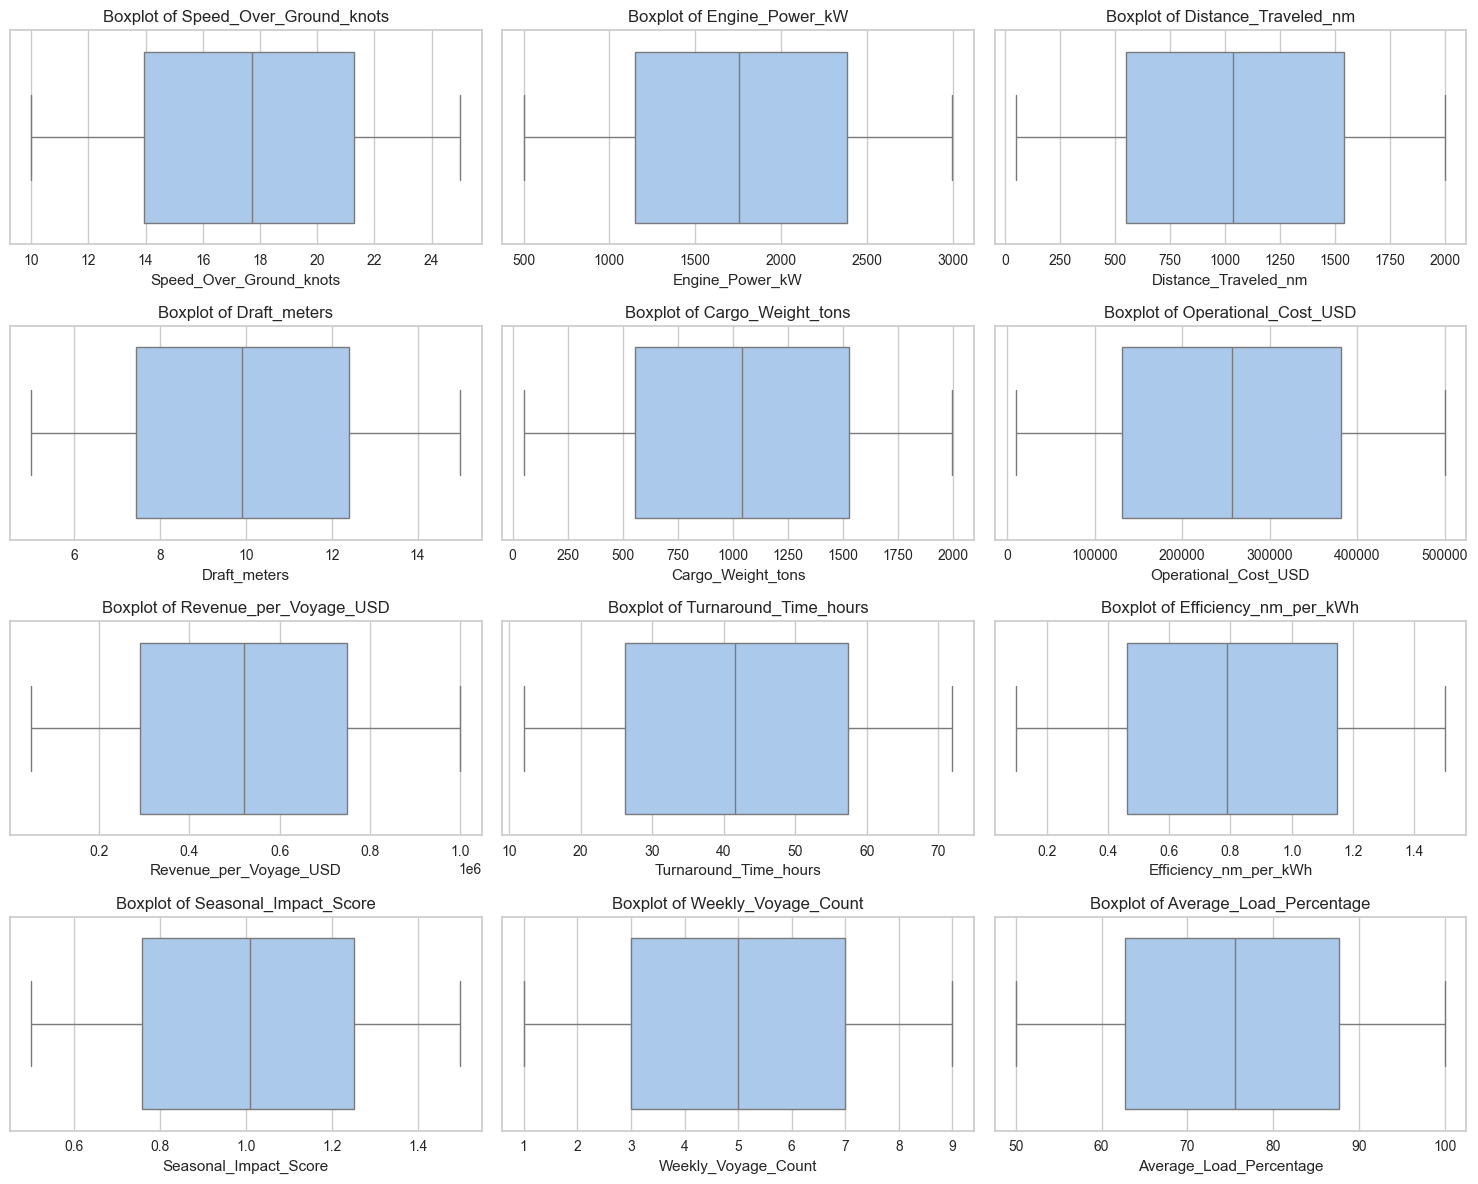

In [9]:
# melihat outlier pada fitur numerik dengan boxplot

# membuat subplot grid 4x3 dengan ukuran 15x12
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Loop untuk membuat boxplot setiap fitur numerik
for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axes[i], palette="pastel", orient="h")
    axes[i].set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

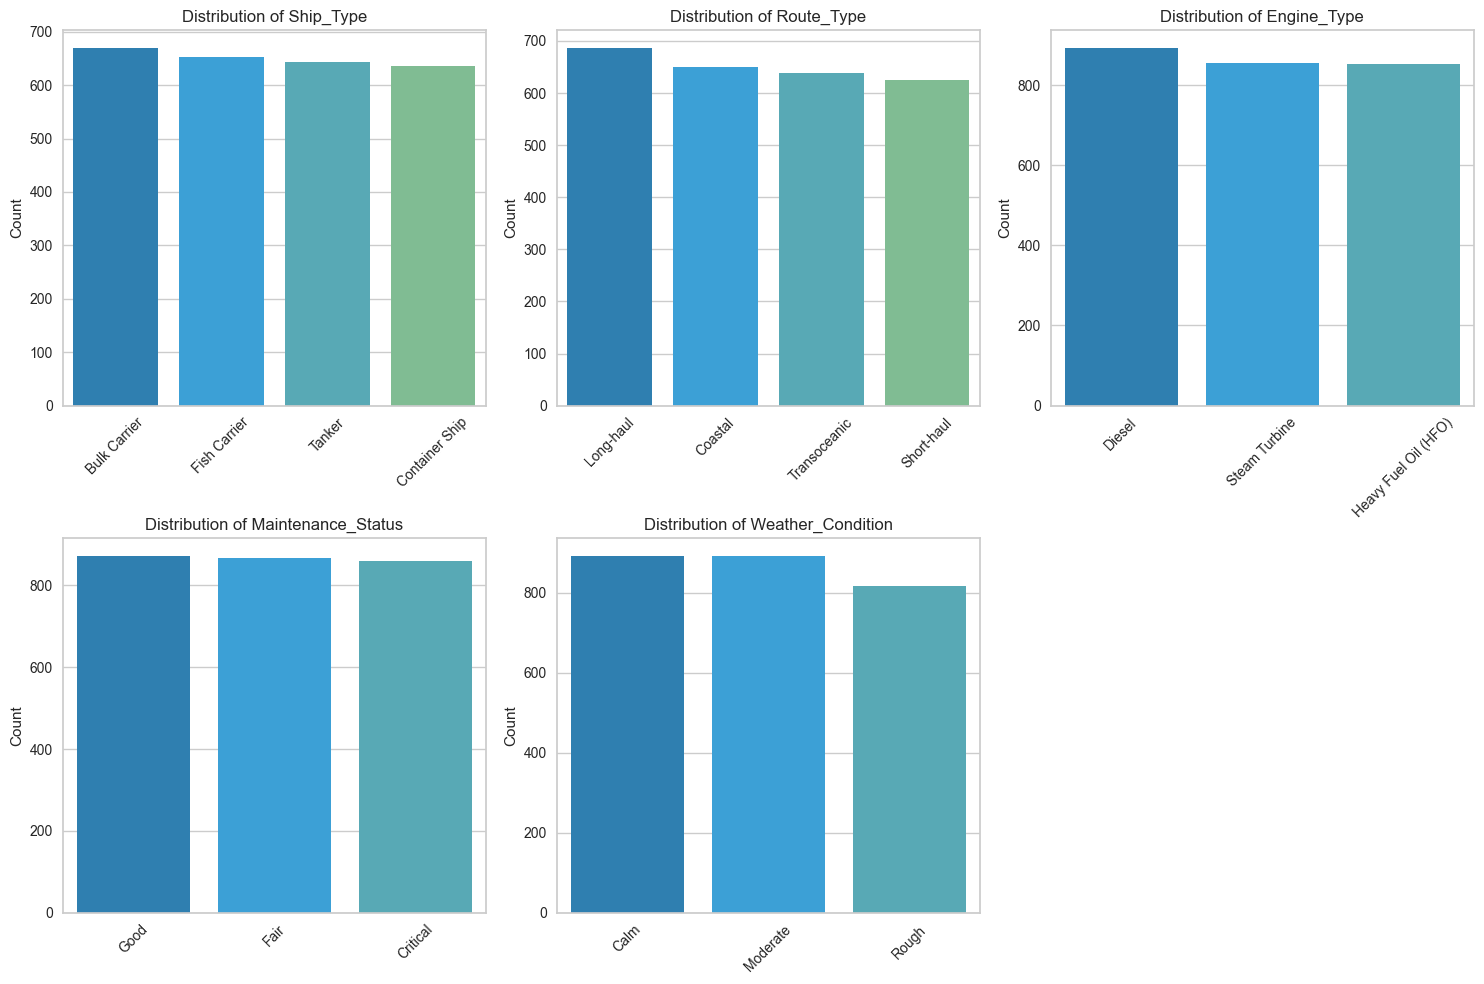

In [10]:
# melihat distribusi fitur kategorik dengan histogram

# inisialisasi fitur kategorik
categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
colors = ["#1984c5", "#22a7f0", "#48b5c4", "#76c68f"]

# loop untuk membuat plot
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 3)  # Atur posisi subplot
    sns.countplot(data=df, x=feature, ax=axes[row, col], palette=colors, order=df[feature].value_counts().index)
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Count")
    axes[row, col].tick_params(axis='x', rotation=45)

# hapus subplot kosong
fig.delaxes(axes[1, 2])  

plt.tight_layout()
plt.show()

<Axes: >

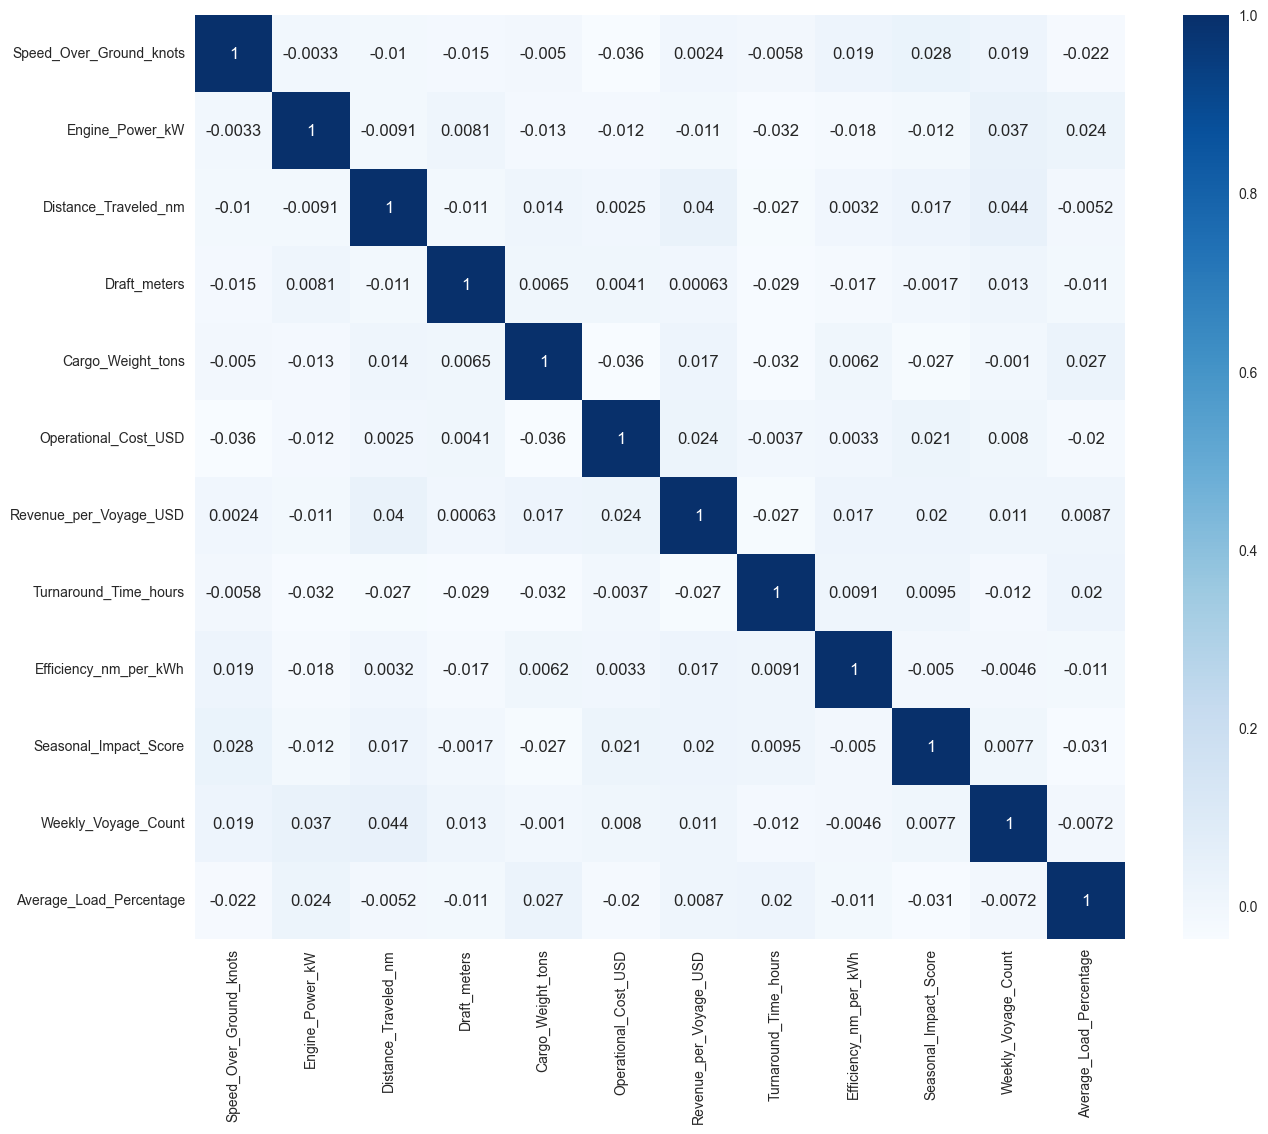

In [11]:
# melihat korelasi pada tiap fitur
plt.figure(figsize=(15,12))
sns.heatmap(df[numeric_features].corr(), cmap='Blues', annot=True)

**Insight :**

Untuk fitur numerik :
- fitur **Efficiency_nm_per_kWh dan Seasonal_Impact_Score memiliki variansi yang rendah** (std dibawah 0.5), ini dapat dicoba untuk **dilakukan feature selection** nantinya karena tidak memiliki banyak variasi dan tidak memberikan banyak informasi yang berguna untuk model.
- Sebagian besar fitur memiliki distribusi yang cukup merata, tanpa ada dominasi nilai tertentu
- Tidak ada outlier pada fitur numerik
- Tidak ada pasangan fitur dengan korelasi tinggi atau memiliki hubungan linier yang kuat

Untuk fitur kategorik :
- Ship_Type: Jenis kapal yang paling sering muncul adalah Bulk Carrier
- Route_Type: Rute yang paling sering digunakan adalah Long-haul
- Engine_Type: Jenis mesin yang paling dominan adalah Diesel
- Maintenance_Status: Status perawatan kapal yang paling umum adalah Good
- Weather_Condition: Kondisi cuaca yang paling sering terjadi adalah Calm

# **5. Data Preprocessing**

## a. Menangani Missing Value

In [12]:
# mengisi missing value dengan modus pada tiap fiturnya

# daftar fitur yang akan diisi dengan modus
categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

# mengisi missing value dengan modus masing-masing fitur
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
# mengecek apakah masih ada data yang missing value
df.isnull().any(axis=1).sum()

0

In [14]:
# mengecek apakah ada data duplikat
df.duplicated().sum()

0

Tidak ada data duplikat

## b. Standarisasi Data

In [15]:
# menyimpan dataframe yang belum ditransform apapun
df_cleaned = df.copy() 

# standarisasi fitur numerik menggunakan standard scaler

scaler = StandardScaler()
# melakukan standarisasi untuk fitur numerik
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,-1.161003,0.425980,-0.009608,1.461520,Moderate,1.658525,1.623465,-0.845173,-0.900768,1.627007,1.429008,-1.507346,1.278649
1,Fish Carrier,Short-haul,Steam Turbine,Good,-1.673617,0.053631,0.042355,1.642611,Rough,-1.557798,1.620311,1.336484,1.219556,-1.259663,-0.410025,0.417824,1.287343
2,Container Ship,Long-haul,Diesel,Fair,0.729934,-0.152125,-0.664052,-0.949214,Moderate,-1.529788,1.372949,-0.469621,0.435091,-0.741138,1.394864,1.572926,1.447458
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,0.800762,-1.175035,0.159036,0.646741,Moderate,1.261758,0.044058,-1.599821,-1.096910,-0.237289,1.273042,-1.507346,-0.622127
4,Fish Carrier,Transoceanic,Diesel,Fair,-0.895364,-0.931672,0.719182,-0.069985,Moderate,-1.381999,0.231250,0.570727,1.271175,1.320115,-1.458833,1.187892,0.330130


## c. Encoding Data Kategorik

In [16]:
# mengubah data kategrorik menjadi numerik menggunakan label encoding

label_encoder = LabelEncoder()

# melakukan encoding untuk fitur kategorik
for feature in categorical_features :
    df[feature] = label_encoder.fit_transform(df[feature])

df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,1,1,1,0,-1.161003,0.425980,-0.009608,1.461520,1,1.658525,1.623465,-0.845173,-0.900768,1.627007,1.429008,-1.507346,1.278649
1,2,2,2,2,-1.673617,0.053631,0.042355,1.642611,2,-1.557798,1.620311,1.336484,1.219556,-1.259663,-0.410025,0.417824,1.287343
2,1,1,0,1,0.729934,-0.152125,-0.664052,-0.949214,1,-1.529788,1.372949,-0.469621,0.435091,-0.741138,1.394864,1.572926,1.447458
3,0,3,2,1,0.800762,-1.175035,0.159036,0.646741,1,1.261758,0.044058,-1.599821,-1.096910,-0.237289,1.273042,-1.507346,-0.622127
4,2,3,0,1,-0.895364,-0.931672,0.719182,-0.069985,1,-1.381999,0.231250,0.570727,1.271175,1.320115,-1.458833,1.187892,0.330130


# **6. Pembangunan Model Clustering**

## a. Pembangunan Model Clustering

Pada project ini, kita akan melakukan clustering menggunakan algoritma KMeans

In [17]:
# melatih model dengan 4 cluster
kmeans_df = KMeans(n_clusters=4, random_state=42).fit(df)

## b. Evaluasi Model Clustering

Untuk menentukan jumlah cluster yang optimal dalam model clustering, kita dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut yang akan dilakukan pada tahap ini :
- menggunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
- menghitung Silhouette Score sebagai ukuran kualitas cluster.

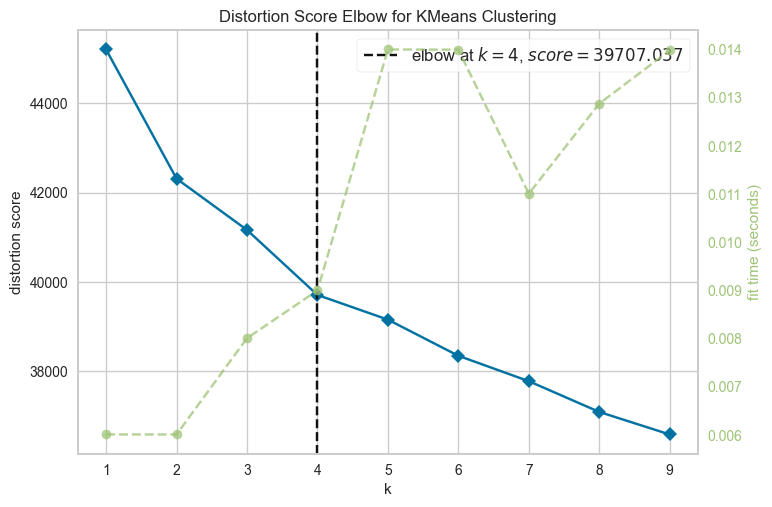

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# melihat k yang optimal untuk df dengan Elbow Method 

# inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42)
 
# inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df)
 
# menampilkan grafik elbow untuk analisis
visualizer.show()

Dari hasil elbow method di atas, dapat disimpulkan bahwa **jumlah cluster yang optimal adalah 4**

In [19]:
# menghitung Silhouette Score untuk df
silhouette_df = silhouette_score(df, kmeans_df.labels_)

print(f'Silhouette Score for df (k=4): {silhouette_df:.4f}')

Silhouette Score for df (k=4): 0.0469


Nilai silhouette 0.0469, sangat dekat dengan 0, ini menunjukkan bahwa **clustering kurang optimal**. Artinya:
- Objek dalam cluster tidak terlalu mirip satu sama lain
- Beberapa titik mungkin berada di perbatasan antar-cluster dan tidak memiliki pemisahan yang jelas
- Bisa jadi pola dalam data kurang jelas atau dimensi pada data terlalu banyak

## c. Feature Selection (opsional)

Pada tahap ini, kita akan melakukan clustering pada data yang dilakukan feature selection (drop fitur dengan varians rendah, sesuai pada EDA sebelumnya) dan melakukan PCA untuk mengurangi dimensi/fitur pada data

In [20]:
# membuat df_selection dengan mendrop fitur Efficiency_nm_per_kWh dan Seasonal_Impact_Score
df_selection = df.drop(columns=['Efficiency_nm_per_kWh', 'Seasonal_Impact_Score'])

# PCA ke 2 dimensi
pca = PCA(n_components=2)
df_selection_pca = pca.fit_transform(df_selection)

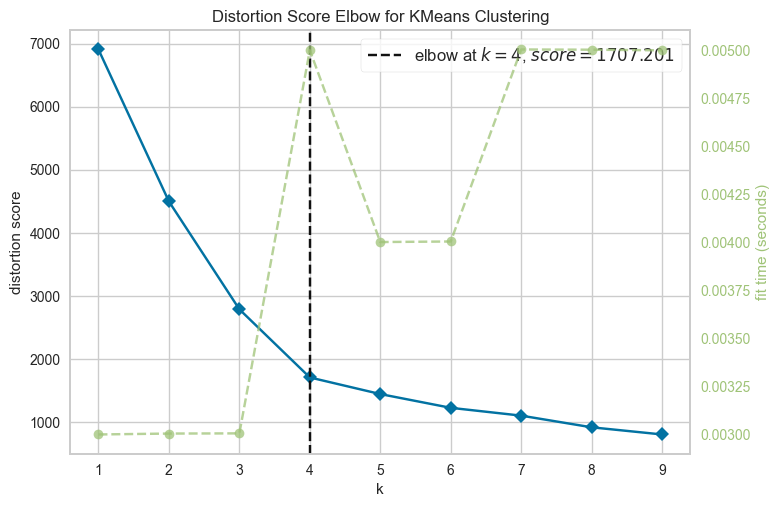

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# melihat k yang optimal untuk df_selection dengan Elbow Method 

# inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42)
 
# inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_selection_pca)
 
# menampilkan grafik elbow untuk analisis
visualizer.show()

In [22]:
# melatih model dengan 4 cluster pada df_selection_pca
kmeans_df_selection_pca = KMeans(n_clusters=4, random_state=42).fit(df_selection_pca)

# menghitung Silhouette Score untuk df_selection
silhouette_df_selection_pca = silhouette_score(df_selection_pca, kmeans_df_selection_pca.labels_)

print(f'Silhouette Score for df_selection_pca (k=4): {silhouette_df_selection_pca:.4f}')

Silhouette Score for df_selection_pca (k=4): 0.4116


Setelah dilakukan feature selection, diperoleh Silhouette Score sebesar 0.0585 untuk k=3

Perbandingan Sebelum dan Sesudah Feature Selection:
- Sebelum feature selection → Silhouette Score: 0.0469 (k=4)
- Sesudah feature selection → Silhouette Score: 0.4116 (k=4)

Terjadi peningkatan skor, yang menunjukkan bahwa feature selection membantu dalam membentuk cluster yang lebih baik. Ini kemungkinan terjadi karena banyaknya dimensi berpengaruh pada performa clustering.

## d. Visualisasi Hasil Clustering

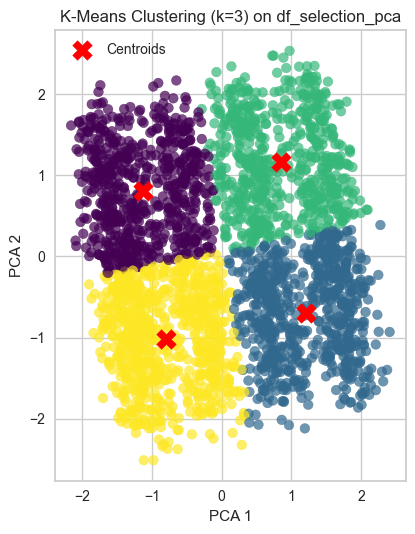

In [23]:
# Visualisasi hasil clustering untuk df_selection_pca
plt.subplot(1, 2, 2)
plt.scatter(df_selection_pca[:, 0], df_selection_pca[:, 1], c=kmeans_df_selection_pca.labels_, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_df_selection_pca.cluster_centers_[:, 0], kmeans_df_selection_pca.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering (k=3) on df_selection_pca')
plt.legend()

plt.tight_layout()
plt.show()

## e. Analisis dan Interpretasi Hasil Cluster

Sebelum melakukan analisis dan interpretasi, kita ambil dulu hasil cluster dan memasukkannya ke df_clean yang belum dilakukan transformasi apapun dan mendrop fitur yang rendah variansi sesuai pada feature selection sebelum clustering

In [24]:
# menambahkan hasil cluster pada df_cleaned
df_cleaned['Cluster'] = kmeans_df_selection_pca.labels_

# mendrop fitur sesuai pada feature selection
df_cleaned = df_cleaned.drop(columns=['Efficiency_nm_per_kWh', 'Seasonal_Impact_Score'])

df_cleaned.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1,93.769249,3
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,2
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,0
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,0
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,2


In [25]:
# menentukan kolom numerik dan kategorikal
numerical_features = [
    'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
    'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
    'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 
    'Weekly_Voyage_Count', 'Average_Load_Percentage'
]

categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type', 
                        'Maintenance_Status', 'Weather_Condition']

# agregasi untuk fitur numerik
numerical_agg = df_cleaned.groupby('Cluster')[numerical_features].agg(['mean'])

# fungsi untuk mengambil modus (nilai paling sering muncul)
def mode_function(x):
    return x.mode()[0] if not x.mode().empty else None

# agregasi untuk fitur kategorikal
categorical_agg = df_cleaned.groupby('Cluster')[categorical_features].agg(mode_function)

# menggabungkan hasil agregasi numerik dan kategorikal
df_cluster_summary = pd.concat([numerical_agg, categorical_agg], axis=1)

df_cluster_summary.T

Cluster,0,1,2,3
"(Speed_Over_Ground_knots, mean)",17.951646,17.507803,17.694739,17.307564
"(Engine_Power_kW, mean)",1767.425105,1754.134648,1822.962543,1698.999258
"(Distance_Traveled_nm, mean)",972.625796,1093.747372,1020.032793,1053.064624
"(Draft_meters, mean)",9.802134,10.122302,9.694625,10.053259
"(Cargo_Weight_tons, mean)",993.79597,1090.294724,1008.490801,1033.026992
"(Operational_Cost_USD, mean)",277146.93021,234271.48405,277483.625864,236830.89736
"(Revenue_per_Voyage_USD, mean)",541100.146564,500649.10689,531806.186775,514581.429619
"(Turnaround_Time_hours, mean)",42.67561,40.431754,40.850892,42.873783
"(Weekly_Voyage_Count, mean)",5.166168,4.595136,5.294788,4.67947
"(Average_Load_Percentage, mean)",74.821345,75.031315,75.883929,75.20465


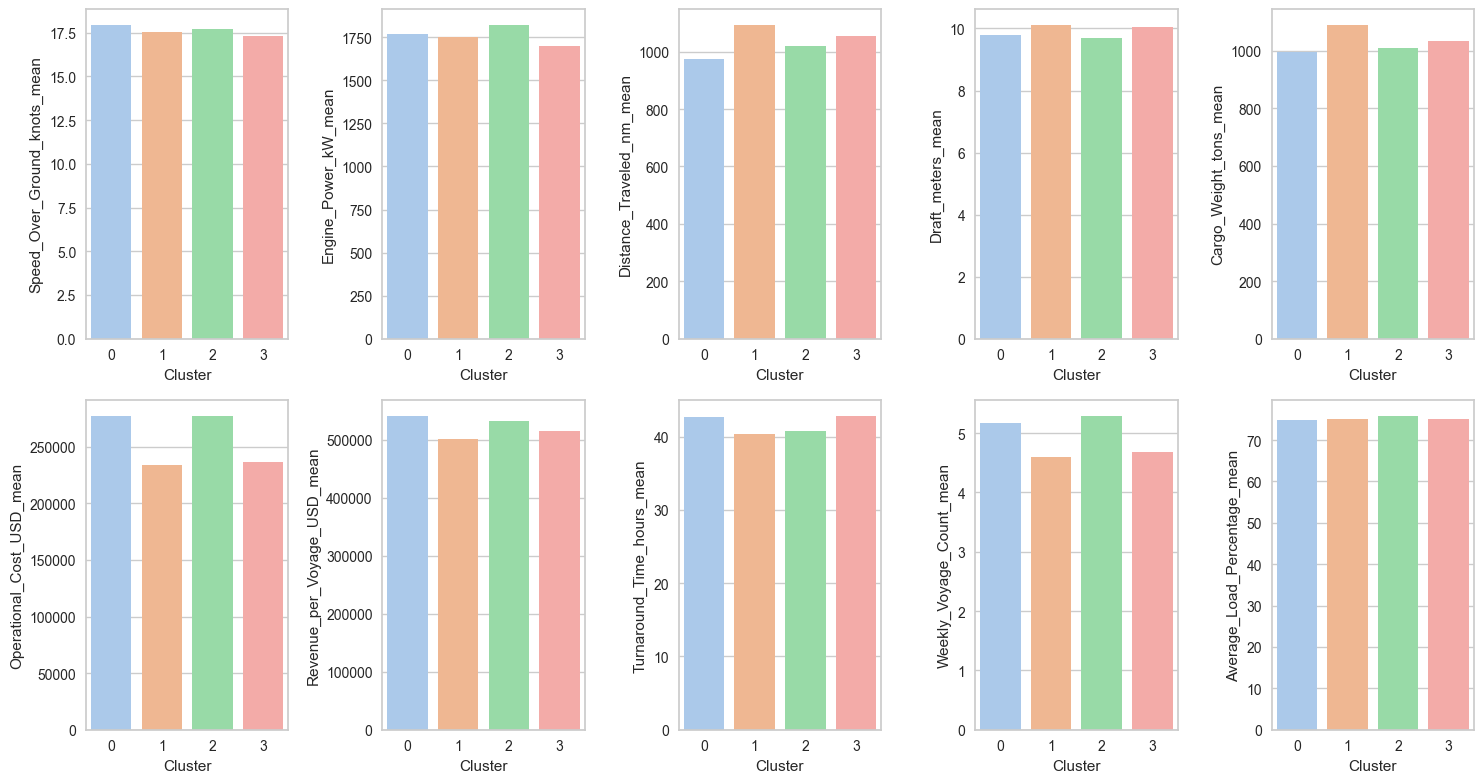

In [26]:
df_cluster_summary.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df_cluster_summary.columns]

# memilih fitur numerik untuk membuat barchart rata-rata fitur numerik pada tiap cluster
df_numeric = df_cluster_summary.select_dtypes(include=[np.number])

# Buat figure dengan 10 subplot (2 kolom × 5 baris)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))  
axes = axes.flatten()  # Flatten array agar mudah diiterasi

# Loop untuk membuat subplot per fitur numerik
for i, col in enumerate(df_numeric.columns):
    sns.barplot(x=df_numeric.index, y=df_numeric[col], ax=axes[i], palette="pastel")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Berdasarkan bar chart yang menampilkan rata-rata fitur numerik per cluster, berikut adalah interpretasi yang dapat diambil per fitur nya:

1️⃣ **Speed Over Ground (knots)**
- Cluster 0 (17.95 knots) dan Cluster 2 (17.69 knots) memiliki kecepatan tertinggi, menunjukkan bahwa kapal dalam klaster ini cenderung lebih cepat.
- Cluster 1 (17.51 knots) dan Cluster 3 (17.31 knots) memiliki kecepatan lebih rendah, yang bisa dipengaruhi oleh bobot muatan atau efisiensi mesin.

2️⃣ **Engine Power (kW)**
- Cluster 2 (1822.96 kW) memiliki tenaga mesin tertinggi, yang menunjukkan bahwa kapal dalam klaster ini memiliki mesin yang lebih bertenaga.
- Cluster 3 (1698.99 kW) memiliki tenaga mesin terendah, yang dapat berdampak pada kecepatan yang lebih rendah dibanding klaster lain.

3️⃣ **Distance Traveled (nm)**
- Cluster 1 (1093.75 nm) dan Cluster 3 (1053.06 nm) memiliki jarak tempuh tertinggi, menunjukkan bahwa kapal dalam klaster ini cenderung berlayar lebih jauh.
- Cluster 0 (972.63 nm) memiliki jarak tempuh paling pendek, yang mungkin disebabkan oleh rute yang lebih singkat atau perjalanan yang lebih sering dalam wilayah terbatas.

4️⃣ **Draft (meters)**
- Cluster 1 (10.12 m) dan Cluster 3 (10.05 m) memiliki draft terdalam, menandakan bahwa kapal dalam klaster ini cenderung membawa muatan lebih berat.
- Cluster 2 (9.69 m) memiliki draft paling dangkal, yang bisa menunjukkan muatan lebih ringan atau desain kapal yang lebih kecil.

5️⃣ **Cargo Weight (tons)**
- Cluster 1 (1090.29 tons) memiliki muatan tertinggi, yang sejalan dengan jarak tempuh yang lebih panjang.
- Cluster 2 (1008.49 tons) memiliki muatan terendah, menunjukkan kemungkinan penggunaan kapasitas yang lebih kecil dibanding klaster lain.

6️⃣ **Operational Cost (USD)**
- Cluster 2 (277,483 USD) dan Cluster 0 (277,146 USD) memiliki biaya operasional tertinggi, yang mungkin disebabkan oleh konsumsi bahan bakar tinggi atau rute yang lebih mahal.
- Cluster 1 (234,271 USD) dan Cluster 3 (236,830 USD) memiliki biaya operasional lebih rendah, menunjukkan efisiensi biaya dalam pengoperasian kapal mereka.

7️⃣ **Revenue per Voyage (USD)**
- Cluster 0 (541,100 USD) memiliki pendapatan per perjalanan tertinggi, diikuti oleh Cluster 2 (531,806 USD). Ini menunjukkan bahwa kapal dalam klaster ini mungkin beroperasi pada rute yang lebih menguntungkan atau memiliki efisiensi muatan lebih baik.
- Cluster 1 (500,649 USD) memiliki pendapatan terendah, yang mungkin disebabkan oleh faktor tarif atau struktur rute yang berbeda.

8️⃣ **Turnaround Time (hours)**
- Cluster 3 (42.87 jam) dan Cluster 0 (42.68 jam) memiliki waktu turnaround terlama, menunjukkan kemungkinan proses bongkar-muat yang lebih lama atau administrasi yang lebih kompleks.
- Cluster 1 (40.43 jam) memiliki turnaround time tercepat, menandakan efisiensi yang lebih baik dalam rotasi pelayaran.

9️⃣ **Weekly Voyage Count**
- Cluster 2 (5.29 perjalanan/minggu) memiliki frekuensi perjalanan tertinggi, menunjukkan efisiensi operasional dan jadwal pelayaran yang lebih ketat.
- Cluster 1 (4.60 perjalanan/minggu) dan Cluster 3 (4.68 perjalanan/minggu) memiliki frekuensi perjalanan lebih rendah, yang mungkin disebabkan oleh rute yang lebih panjang atau turnaround time yang lebih lama.

🔟 **Average Load Percentage**
- Cluster 2 (75.88%) memiliki load factor tertinggi, menunjukkan bahwa kapal dalam klaster ini lebih sering beroperasi dengan kapasitas penuh.
- Cluster 0 (74.82%) memiliki load factor terendah, tetapi perbedaannya relatif kecil dibandingkan klaster lain.

⏸️ **Categorical Features**
- Cluster 0 & 3 terdiri dari Bulk Carrier, tetapi Cluster 0 memiliki rute Transoceanic, sedangkan Cluster 3 memiliki rute Long-haul.
- Cluster 1 terdiri dari Tanker dengan rute Long-haul, yang dapat menjelaskan muatan berat dan biaya operasional yang lebih rendah.
- Cluster 2 terdiri dari Fish Carrier, yang memiliki tenaga mesin tinggi dan load factor tertinggi.
- Cluster 0 memiliki status pemeliharaan ‘Critical’, yang bisa berdampak pada efisiensi operasional.


### **Kesimpulan Klasterisasi Kapal**
🚢 **Cluster 0: Bulk Carrier (Transoceanic, Critical Maintenance)**
- Biaya operasional tinggi, tetapi juga pendapatan tertinggi.
- Jarak tempuh lebih pendek, mungkin karena rute transoceanic yang lebih efisien.
- Memiliki status pemeliharaan "Critical", yang mungkin berkontribusi pada tingginya biaya operasional.
- Turnaround time cukup lama.

⛽ **Cluster 1: Tanker (Long-haul, Good Maintenance)**
- Muatan terbesar dengan draft terdalam.
- Biaya operasional lebih rendah, tetapi pendapatan juga lebih rendah dibanding klaster lain.
- Frekuensi perjalanan lebih sedikit, kemungkinan karena waktu perjalanan yang lebih lama.
- Mesin lebih kecil dibanding klaster lain, tetapi efisien dalam konsumsi bahan bakar.

🐟 **Cluster 2: Fish Carrier (Transoceanic, Good Maintenance)**
- Memiliki tenaga mesin tertinggi dan kecepatan yang tinggi.
- Pendapatan cukup tinggi, tetapi masih lebih rendah dibanding Cluster 0.
- Load factor tertinggi, menunjukkan efisiensi dalam penggunaan kapasitas muatan.
- Biaya operasional tertinggi, yang kemungkinan disebabkan oleh konsumsi bahan bakar dan jarak tempuh yang panjang.

📦 **Cluster 3: Bulk Carrier (Long-haul, Good Maintenance)**
- Kapal dengan jarak tempuh panjang, tetapi biaya operasional lebih rendah.
- Turnaround time tercepat, menunjukkan efisiensi dalam proses bongkar-muat.
- Muatan lebih besar dibanding Cluster 0, tetapi dengan biaya operasional yang lebih efisien.

# **7. Mengeksport Data**

In [27]:
df_cleaned.to_csv("Dataset_inisiasi.csv", index=False)